In [1]:
import argparse
import torch
import torch.nn.parallel
from models import senet
from models import resnet
from models import densenet
from models import modules
from models import net
import numpy as np
import loaddata_demo as loaddata
import pdb
import matplotlib.image
import matplotlib.pyplot as plt
plt.set_cmap("jet")

In [2]:
def define_model(is_resnet,is_densenet,is_senet):
    if is_resnet:
        original_model = resnet.resnet50(pretrained = True)
        Encoder = modules.E_resnet(original_model)
        model = net.model(Encoder, num_features=2048, block_channel = [256,512,1024,2048])
    if is_densenet:
        original_model = densenet.densenet161(pretrained = True)
        Encoder = modules.E_densenet(original_model)
        model = net.model(Encoder, num_features=2208, block_channel = [192,384,1056,2208])
    if is_senet:
        original_model = senet.senet154(pretrained='imagenet')
        Encoder = modules.E_senet(original_model)
        model = net.model(Encoder, num_features=2048, block_channel = [256,512,1024,2048])
        
    return model

In [28]:
def main():
    model = define_model(is_resnet=True, is_densenet=False, is_senet=False)
    model = torch.nn.DataParallel(model).cuda()
    model.load_state_dict(torch.load('C:/Users/Zhuolei He/Desktop/pretrained_model/model_resnet'))
    model.eval()
    
    nyu2_loader = loaddata.readNyu2('data/demo/dragon.jpg')
    
    test(nyu2_loader, model)

In [29]:
def test(nyu2_loader, model):
    for i, image in enumerate(nyu2_loader):
        with torch.no_grad():
            image = torch.autograd.Variable(image)
            out = model(image)
        
            matplotlib.image.imsave('data/demo/dragon_2.png', out.view(out.size(2),out.size(3)).data.cpu().numpy())
if __name__ == '__main__':
    main()

In [ ]:
import matplotlib.image as mpimg

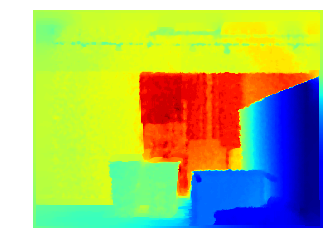

In [15]:
test = mpimg.imread('data/demo/00027_depth.png')

plt.imshow(test)
plt.axis('off')
plt.show()